In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy import signal as sig
grey = plt.get_cmap('gray')
from IPython.display import Image
%matplotlib inline

## Basic signal extraction: ERP/ERFs

**MEG@McGill**  
March 16, 2015

**Jeremy Moreau**

### ERPs and ERFs

- ERP: Event-related potential (EEG)

- ERF: Event-related field (MEG)

### A simple idea

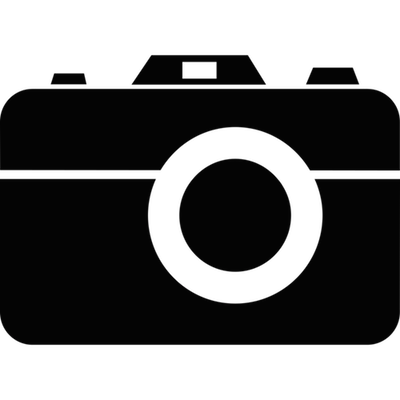

In [3]:
#### Let's say you have a really cheap camera...
Image(filename='images/camera.png')

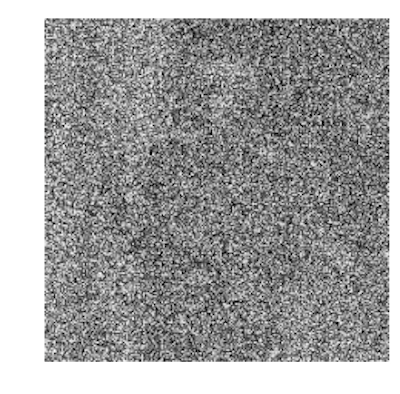

In [5]:
#### That takes really bad pictures...
Image(filename='images/noisy_danbo.png')

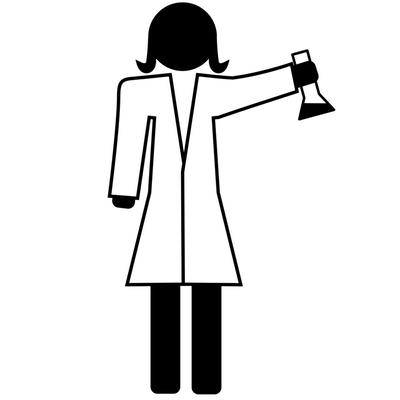

In [6]:
#### but you're a scientist!
Image(filename='images/scientist.png')

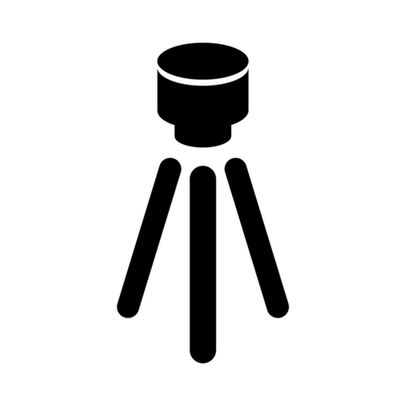

In [7]:
#### and you have a tripod!
Image(filename='images/tripod.png')

## What do you do?

#### Ok, so I cheated a bit.

In [3]:
danbo = io.imread('images/danbo.png')

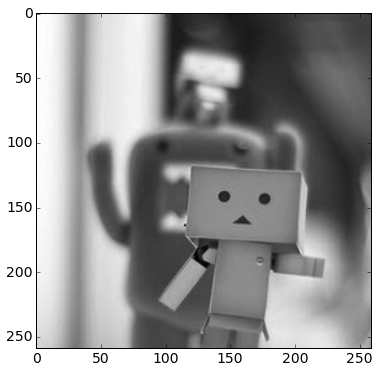

In [4]:
plt.imshow(danbo, cmap = grey);

#### Generate some noise

In [5]:
# generate a thousand 259 x 259 matrices of random values
noise = np.random.rand(1000, np.shape(danbo)[0], np.shape(danbo)[1]) * 1500

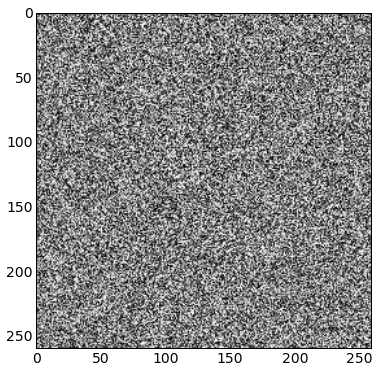

In [6]:
plt.imshow(noise[0], cmap = grey);

#### Add the image to the noise

In [7]:
noisy_danbo = danbo + noise

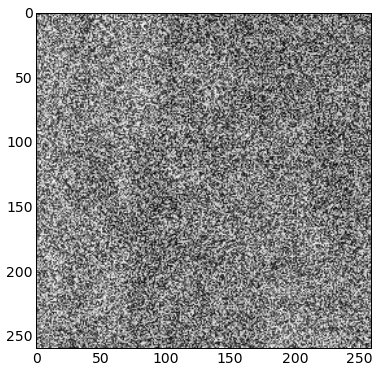

In [8]:
plt.imshow(noisy_danbo[0], cmap = grey);

### The signal remains constant while the noise varies

## Average!

In [9]:
danbo_10 = np.average(noisy_danbo[0:10], axis=0)
danbo_100 = np.average(noisy_danbo[0:100], axis=0)
danbo_1000 = np.average(noisy_danbo[0:1000], axis=0)

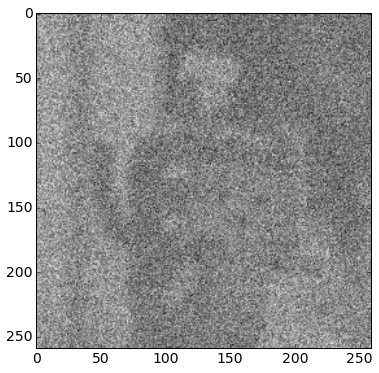

In [10]:
plt.imshow(danbo_10, cmap = grey);

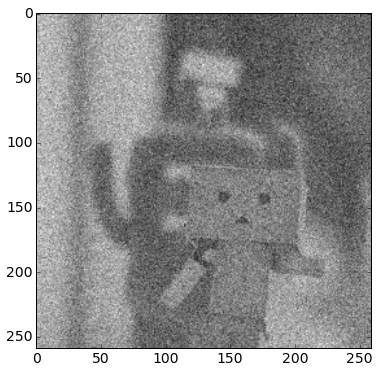

In [11]:
plt.imshow(danbo_100, cmap = grey);

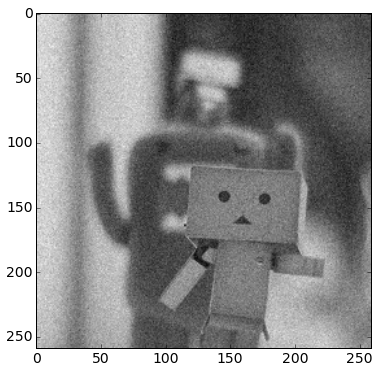

In [12]:
plt.imshow(danbo_1000, cmap = grey);

### SNR increases in proportion to the square root of the number of trials  
  
<br>
$$\Large SNR = (S/N)\sqrt{T}$$


#### An example: 1 trial

In [13]:
signal = 10
noise = 50
trials = 1
 
snr = signal / noise * np.sqrt(trials)

print('SNR for one trial: %s' %snr)

SNR for one trial: 0.2


#### An example: 2 trials

In [14]:
signal = 10
noise = 50
trials = 2

snr = signal / noise * np.sqrt(trials)

print('SNR for two trials: %s' %snr)

SNR for two trials: 0.282842712475


#### An example: 100 trials

In [15]:
signal = 10
noise = 50
trials = 100

snr = signal / noise * np.sqrt(trials)

print('SNR for 100 trials: %s' %snr)

SNR for 100 trials: 2.0


#### An example: 0-1000 trials

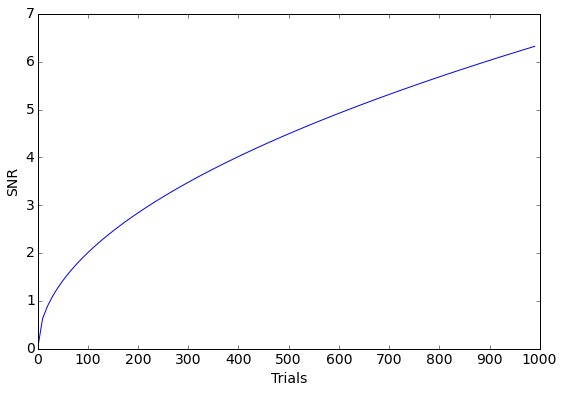

In [16]:
signal = 10
noise = 50
trials = np.linspace(0, 1000, 100) # generate 100 values between 0 and 1000

snr = signal / noise * np.sqrt(trials)

plt.plot(snr)
plt.ylabel('SNR'); plt.xlabel('Trials'); plt.xticks(range(0, 101, 10), range(0, 1001, 100));

### That's great and all, but what about ERP/ERFs?

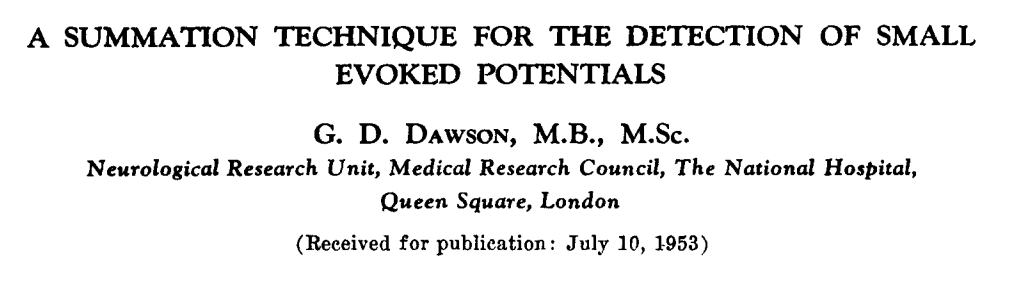

In [13]:
Image(filename='images/dawson_1953_title.png')

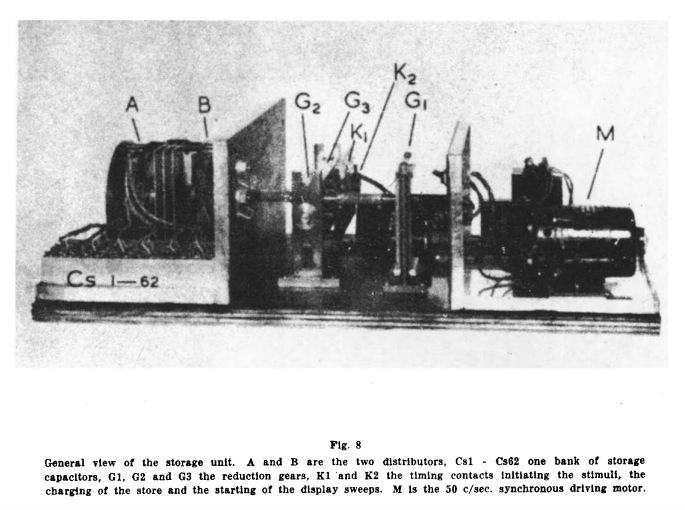

In [14]:
Image(filename='images/dawson_1953_fig8.png')

<sub>— <cite>[Dawson, 1953][1]</cite></sub>

[1]: http://dx.doi.org/10.1016/0013-4694(54)90007-3

### And now for some... real data

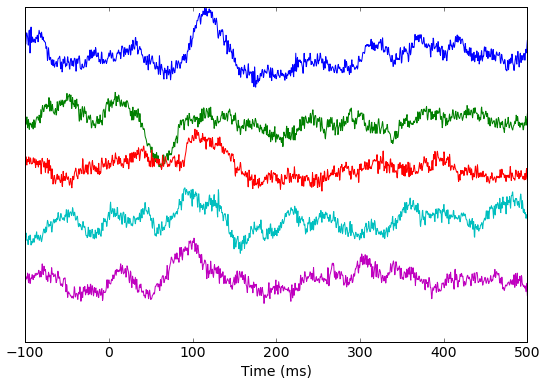

In [17]:
data = np.load('data/standard_epochs_ch126.npz')

for i in range(5):
    plt.plot(data['time'], data['meg'][i] - (i * 1200))

plt.xlabel('Time (ms)'); plt.yticks([]);

## Average!

In [18]:
erf_10 = np.average(data['meg'][0:10], axis=0)
erf_50 = np.average(data['meg'][0:100], axis=0)
erf_200 = np.average(data['meg'][0:200], axis=0)

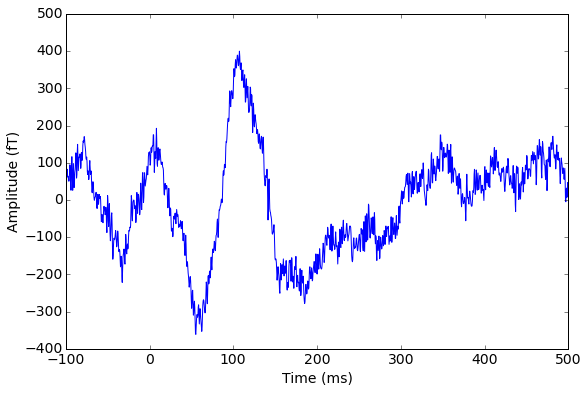

In [19]:
plt.plot(data['time'], erf_10)
plt.xlabel('Time (ms)'); plt.ylabel('Amplitude (fT)');

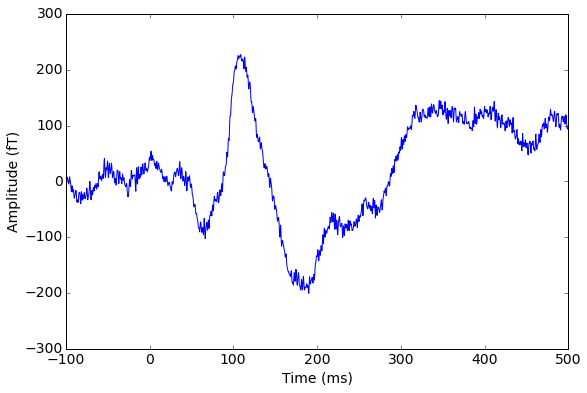

In [20]:
plt.plot(data['time'], erf_50)
plt.xlabel('Time (ms)'); plt.ylabel('Amplitude (fT)');

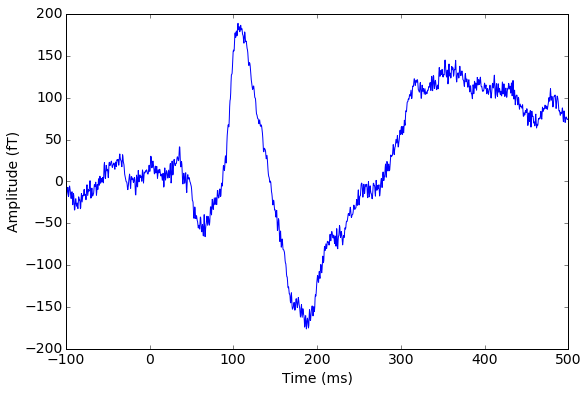

In [21]:
plt.plot(data['time'], erf_200)
plt.xlabel('Time (ms)'); plt.ylabel('Amplitude (fT)');

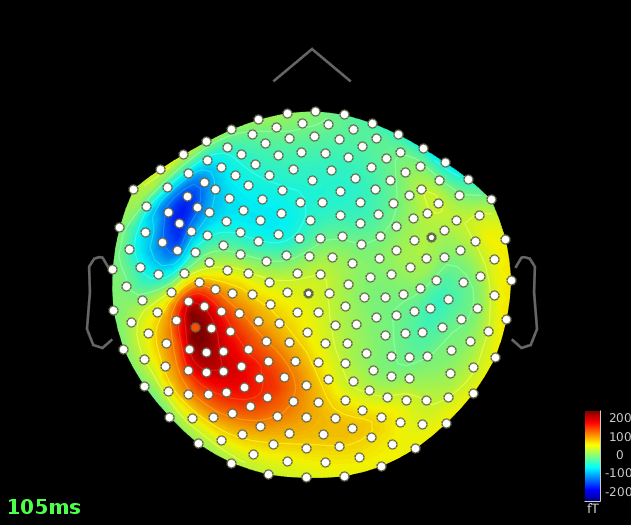

In [11]:
Image(filename='images/topography_126.png')

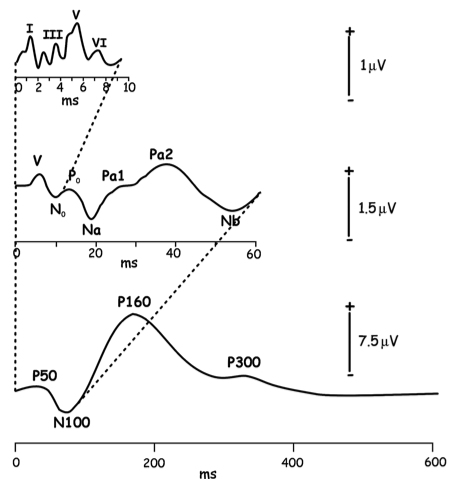

In [12]:
Image(filename='images/luck_2014_fig3.5.png')

<sub>— <cite>[Luck, 2014][1]</cite></sub>

[1]: http://mitpress.mit.edu/books/introduction-event-related-potential-technique-1

### What's this "Event-related" thing all about?

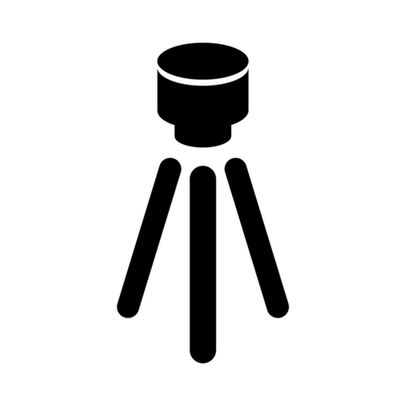

In [10]:
Image(filename='images/tripod.png')

### ERP/ERFs rely on four main assumptions:

- The response to the stimulus is the same on every trial.

- The background "noise" is truly random. 

- The ERP/ERF waveform is time-locked to the stimulus.

 - The ERP/ERF waveform is phase-locked to the stimulus.

#### The response to the stimulus is the same on every trial.

#### The background "noise" is truly random.

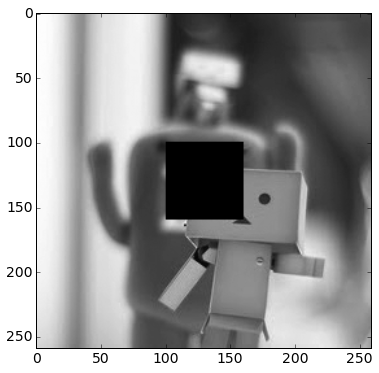

In [22]:
danbo2 = np.copy(danbo)
danbo2[100:160, 100:160] = 1  # set 60 pixels in middle of image to 1 (black)
plt.imshow(danbo2, cmap = grey);

#### The ERP/ERF waveform is time-locked to the stimulus

(0.0, 600.0, -1.2, 4.2000000000000002)

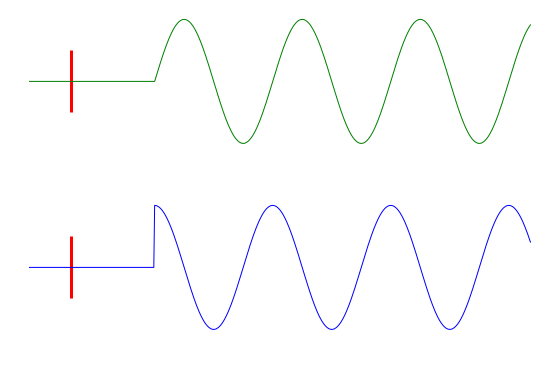

In [23]:
sine1 = np.insert(np.sin(np.linspace(np.pi/2, 20 + np.pi/2, 450)), 0, np.zeros(150))
sine2 = np.insert(np.sin(np.linspace(0, 20, 450)) + 3, 0, np.ones(150) * 3)

time_locked_fig = plt.figure()
plt.plot(sine1)
plt.plot(sine2)
plt.vlines(50, -0.5, 0.5, linewidth=3, color='r')
plt.vlines(50, 2.5, 3.5, linewidth=3, color='r')
plt.ylim(-1.2, 4.2)
plt.axis('off')

#### The ERP/ERF waveform is phase-locked to the stimulus

(0.0, 600.0, -1.2, 4.2000000000000002)

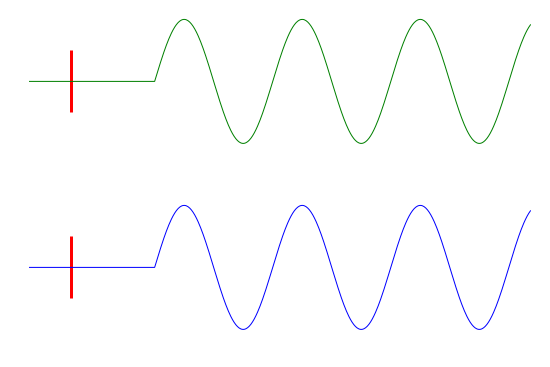

In [25]:
sine3 = np.insert(np.sin(np.linspace(0, 20, 450)), 0, np.zeros(150))
sine4 = np.insert(np.sin(np.linspace(0, 20, 450)) + 3, 0, np.ones(150) * 3)

phase_locked_fig = plt.figure()
plt.plot(sine3)
plt.plot(sine4)
plt.vlines(50, -0.5, 0.5, linewidth=3, color='r')
plt.vlines(50, 2.5, 3.5, linewidth=3, color='r')
plt.ylim(-1.2, 4.2)
plt.axis('off')

### Two competing theories attempt to explain how ERP/ERFs relate to ongoing oscillatory EEG activity

- The *additive model*

- The *phase resetting model*

#### The additive model proposes that EEG and ERP/ERFs reflect discrete neural events, which are independent from each other.

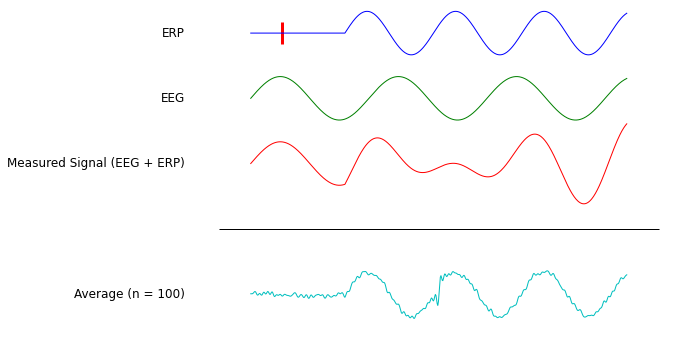

In [27]:
def generate_eeg_erp(n, phase_jitter):
    waves = []
    for count in range(n):
        jitter = np.random.randint(phase_jitter)
        sine = np.insert(np.sin(np.linspace(0, 20, 450)) +3, 0, np.ones(150) *3)
        sine2 = np.sin(np.linspace(0 + (jitter * np.pi/2), 20 - (jitter  * np.pi/2), 600))
        
        sine1_2 = sine + sine2
        waves.append(sine1_2)
    
    return waves

eeg_erp_waves = generate_eeg_erp(100, 200)
eeg_erp_waves_avg = np.average(eeg_erp_waves, axis=0)

sine5 = np.insert(np.sin(np.linspace(0, 20, 450)) +3, 0, np.ones(150) *3)
sine6 = np.sin(np.linspace(0, 20, 600))
sine5_6 = sine5 + sine6

additive_model_fig, ax = plt.subplots()

ax.plot(sine5)
ax.plot(sine6)
ax.vlines(50, 2.5, 3.5, linewidth=3, color='r')
ax.plot(sine5_6 - 6)
ax.hlines(-6, -50, 650, linewidth=1, color='k')
ax.plot(eeg_erp_waves_avg - 12)

ax.set_ylim(-11.2, 4.2)
plt.yticks([-9, -3, 0, 3],['Average (n = 100)','Measured Signal (EEG + ERP)', 'EEG', 'ERP'], fontsize=12)
#plt.axis('off')
ax.tick_params(
    axis='both',
    which='both',
    bottom='off',
    top='off',
    left='off',
    right='off',
    labelbottom='off')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#### The phase resetting model proposes that the presented stimulus perturbs ongoing EEG oscillations, causing them to align to the stimulus.

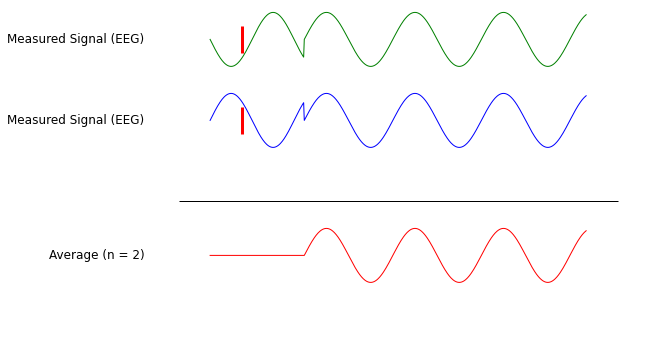

In [29]:
sine7 = np.sin(np.linspace(0, 20, 450))

phase_reset_sine1 = np.insert(sine7, 0, np.sin(np.linspace(0, 7, 150)))
phase_reset_sine2 = np.insert(sine7, 0, np.sin(np.linspace(np.pi, 7 + np.pi, 150))) + 3
phase_reset_average = np.average([phase_reset_sine1, phase_reset_sine2], axis=0)

phase_resetting_model_fig, ax = plt.subplots()

ax.plot(phase_reset_sine1)
ax.plot(phase_reset_sine2)
ax.vlines(50, 2.5, 3.5, linewidth=3, color='r')
ax.vlines(50, -0.5, 0.5, linewidth=3, color='r')
ax.hlines(-3, -50, 650, linewidth=1, color='k')
ax.plot(phase_reset_average - 6.5)

ax.set_ylim(-8.2, 4.2)
plt.yticks([-5, 0, 3],['Average (n = 2)',
                       'Measured Signal (EEG)',
                       'Measured Signal (EEG)'], fontsize=12)
#plt.axis('off')
ax.tick_params(
    axis='both',
    which='both',
    bottom='off',
    top='off',
    left='off',
    right='off',
    labelbottom='off')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

### Event-related, evoked, and induced—some nomenclature

#### EEG

- Evoked: automatic sensory responses (e.g. Auditory Brainstem Response)

- Event-related: non-obligatory cognitive-related responses (e.g. P3)

- "Event-related" is often used to refer to both, and sometimes the terms are just used interchangeably...

#### MEG

- Evoked: responses that are both time and phase-locked to the stimulus

- Induced: responses that are time, but not phase-locked to the stimulus

### Induced?

### The problem

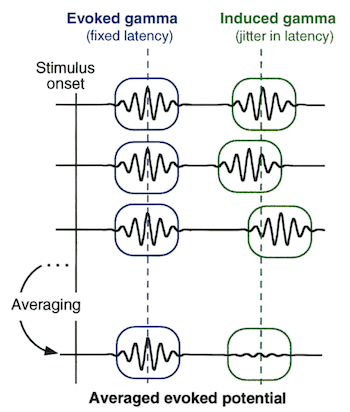

In [15]:
Image(filename='images/tallon-baudry_1999_box1.png')

<sub>— <cite>[Tallon-Baudry & Bertrand, 1999][1]</cite></sub>

[1]: http://dx.doi.org/10.1016/S1364-6613(99)01299-1

#### Only a problem at higher-frequencies

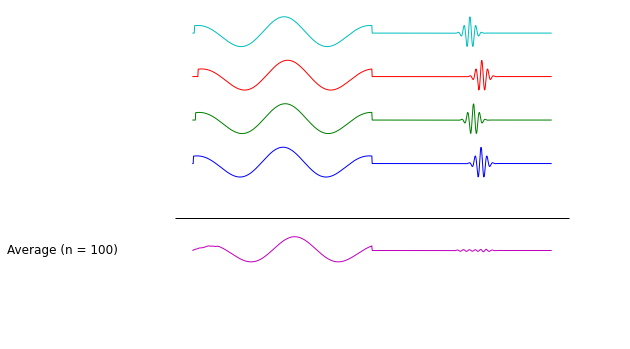

In [31]:
def generate_morlets(n, freq1, freq2, freq1_jitter, freq2_jitter):
    waves = []
    for count in range(n):
        w1 = sig.morlet(500, 5, freq1)
        w2 = sig.morlet(500, 5, freq2)
        jitter1 = np.random.randint(freq1_jitter)
        jitter2 = np.random.randint(freq2_jitter)
        
        wave = np.concatenate([np.zeros(jitter1), w1], axis=0)
        wave = wave[0:wave.size-jitter1]
        wave = np.concatenate([wave, np.zeros(jitter2), w2], axis=0)
        wave = wave[0:wave.size-jitter2] + (count * 2)
        
        waves.append(wave)
        
    return waves

morlets = generate_morlets(100, 0.2, 3, 75, 75)
morlets_avg = np.average(morlets, axis=0)

freq_avg_fig, ax = plt.subplots()

for morlet in morlets[0:4]:
    ax.plot(np.real(morlet))
ax.hlines(-2.5, -50, 1050, linewidth=1, color='k')
ax.plot(np.real(morlets_avg) - 103)

ax.set_ylim(-8.2, 7.2)
plt.yticks([-4],['Average (n = 100)'], fontsize=12)
#plt.axis('off')
ax.tick_params(
    axis='both',
    which='both',
    bottom='off',
    top='off',
    left='off',
    right='off',
    labelbottom='off')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

### One possible solution

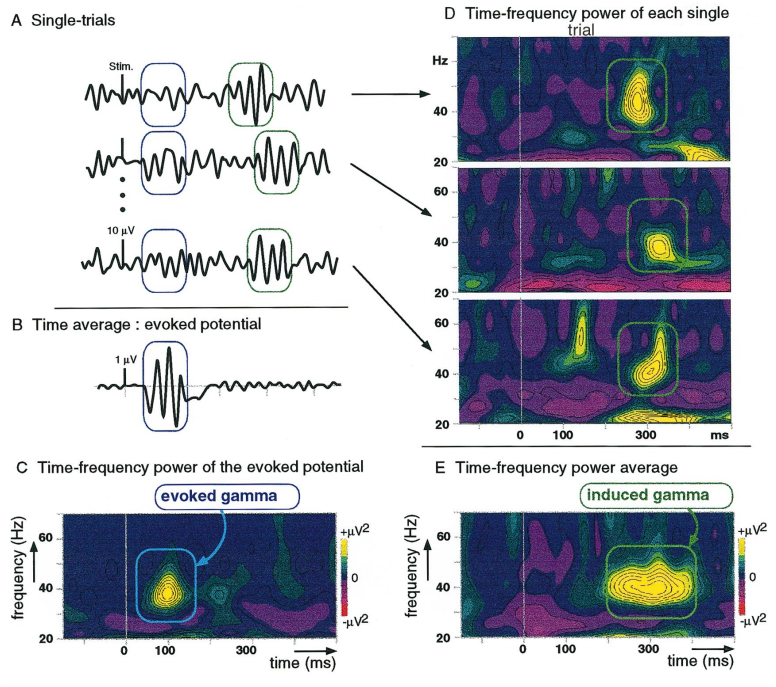

In [8]:
Image(filename='images/tallon-baudry_1999_box2.png')

<sub>— <cite>[Tallon-Baudry & Bertrand, 1999][1]</cite></sub>

[1]: http://dx.doi.org/10.1016/S1364-6613(99)01299-1

### Averaging does not magically solve all your problems

"Laplace, in the eighteenth century, predicted that by averaging enough data it should be possible to demonstrate a lunar tide in the atmospheric pressure."
  
*However...*  
"Until he had removed from the data the larger irregular fluctuations and also the very large, but regular variations due to the heat of the sun, Chapman was unable to demonstrate the variation of pressure of lunar origin."

— <cite>[Dawson, 1953][1]</cite>

[1]: http://dx.doi.org/10.1016/0013-4694(54)90007-3

#### In summary

- Averaging allows us to extract a constant signal from randomly varying noise.

- SNR increases in proportion to the square root of the number of trials.

- ERP/ERFs rely on four main assumptions: identical responses on every trial, random "noise", time-locking, phase-locking

- There are two main theories explaining how ERP/ERFs relate to ongoing oscillatory EEG activity: the additive model, and the phase resetting model

- Evoked responses are time and phase-locked, whereas induced responses are time, but not phase-locked.

- We can extract induced responses by averaging the time-frequency representation of each single trial.

#### Suggested readings
- [Hansen P, Kringelbach M, Salmelin R. MEG: An Introduction to Methods. New York: Oxford University Press; 2010.][1]
- [Luck SJ. An Introduction to the Event-Related Potential Technique. MIT Press; 2014.][2]
- [Luck SJ, Kappenman ES. The Oxford handbook of event-related potential components. Oxford university press; 2011.][3]
- [Tallon-Baudry C, Bertrand O. Oscillatory gamma activity in humans and its role in object representation. Trends Cogn Sci. 1999 Apr;3(4):151–62.][4]

[1]: http://www.oxfordscholarship.com/view/10.1093/acprof:oso/9780195307238.001.0001/acprof-9780195307238
[2]: http://mitpress.mit.edu/books/introduction-event-related-potential-technique-1)
[3]: http://www.oxfordhandbooks.com/view/10.1093/oxfordhb/9780195374148.001.0001/oxfordhb-9780195374148
[4]: http://dx.doi.org/10.1016/S1364-6613(99)01299-1